In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather_Lock\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (34654, 11)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
# Model architecture for MLP with 1 hidden layer and L1 Regularization
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [9]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 651 (2.54 KB)
Trainable params: 651 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 2s 2ms/step - loss: 150502.8906 - mse: 150498.8438 - rmse: 376.2852 - mae: 253.1018 - mape: 4298810368.0000 - val_loss: 115013.5859 - val_mse: 115007.6953 - val_rmse: 333.1889 - val_mae: 235.2272 - val_mape: 4561550848.0000
Epoch 2/100
1083/1083 [==============================] - 2s 1ms/step - loss: 116418.1406 - mse: 116411.6953 - rmse: 335.6079 - mae: 233.0919 - mape: 4354333184.0000 - val_loss: 110195.6016 - val_mse: 110188.7734 - val_rmse: 326.2179 - val_mae: 227.6110 - val_mape: 4228920576.0000
Epoch 3/100
1083/1083 [==============================] - 1s 1ms/step - loss: 112357.9688 - mse: 112350.8516 - rmse: 329.5542 - mae: 227.0643 - mape: 3994529792.0000 - val_loss: 107141.2422 - val_mse: 107133.9453 - val_rmse: 321.3436 - val_mae: 219.8752 - val_mape: 3735846400.0000
Epoch 4/100
1083/1083 [==============================] - 1s 1ms/step - loss: 109913.5391 - mse: 109905.9688 - rmse: 326.1303 - mae: 223.1292 - mape: 38638010

1083/1083 [==============================] - 2s 1ms/step - loss: 93691.4922 - mse: 93680.3906 - rmse: 299.9686 - mae: 196.2443 - mape: 3444345088.0000 - val_loss: 85959.3281 - val_mse: 85948.1094 - val_rmse: 285.8708 - val_mae: 186.2853 - val_mape: 3373376256.0000
Epoch 31/100
1083/1083 [==============================] - 1s 1ms/step - loss: 93502.8594 - mse: 93491.6328 - rmse: 299.9333 - mae: 195.9307 - mape: 3450406656.0000 - val_loss: 85473.9922 - val_mse: 85462.7734 - val_rmse: 285.4029 - val_mae: 188.1316 - val_mape: 3524989952.0000
Epoch 32/100
1083/1083 [==============================] - 1s 1ms/step - loss: 93046.2266 - mse: 93035.0859 - rmse: 299.1009 - mae: 195.8001 - mape: 3462746112.0000 - val_loss: 85825.8047 - val_mse: 85814.4688 - val_rmse: 285.5179 - val_mae: 184.1457 - val_mape: 3280649728.0000
Epoch 33/100
1083/1083 [==============================] - 1s 1ms/step - loss: 93444.1406 - mse: 93432.8828 - rmse: 299.2474 - mae: 195.6112 - mape: 3468215808.0000 - val_loss: 851

1083/1083 [==============================] - 1s 1ms/step - loss: 89678.9609 - mse: 89666.6797 - rmse: 292.7314 - mae: 189.0803 - mape: 3178372096.0000 - val_loss: 80368.1250 - val_mse: 80355.6953 - val_rmse: 275.9009 - val_mae: 177.7596 - val_mape: 3143370240.0000
Epoch 60/100
1083/1083 [==============================] - 1s 1ms/step - loss: 90425.4297 - mse: 90412.9688 - rmse: 294.0421 - mae: 189.8021 - mape: 3295572480.0000 - val_loss: 80880.5781 - val_mse: 80868.1719 - val_rmse: 276.9466 - val_mae: 178.3637 - val_mape: 3122682112.0000
Epoch 61/100
1083/1083 [==============================] - 1s 1ms/step - loss: 88816.0078 - mse: 88803.5625 - rmse: 291.6961 - mae: 187.7776 - mape: 3186694400.0000 - val_loss: 80648.4453 - val_mse: 80635.9141 - val_rmse: 276.3676 - val_mae: 178.2242 - val_mape: 3178598912.0000
Epoch 62/100
1083/1083 [==============================] - 1s 1ms/step - loss: 90016.2344 - mse: 90003.8047 - rmse: 293.2979 - mae: 189.3429 - mape: 3188303360.0000 - val_loss: 804

In [12]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 929us/step - loss: 76848.7344 - mse: 76835.7578 - rmse: 270.3618 - mae: 172.2839 - mape: 2768308480.0000
Test Loss: [76848.734375, 76835.7578125, 270.3618469238281, 172.2838897705078, 2768308480.0]


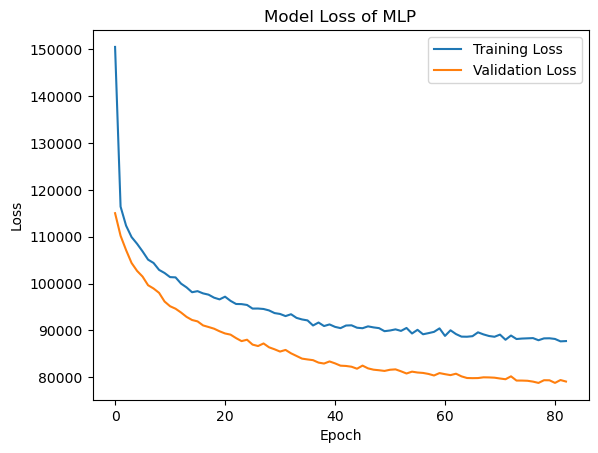

In [13]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of MLP')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 808us/step


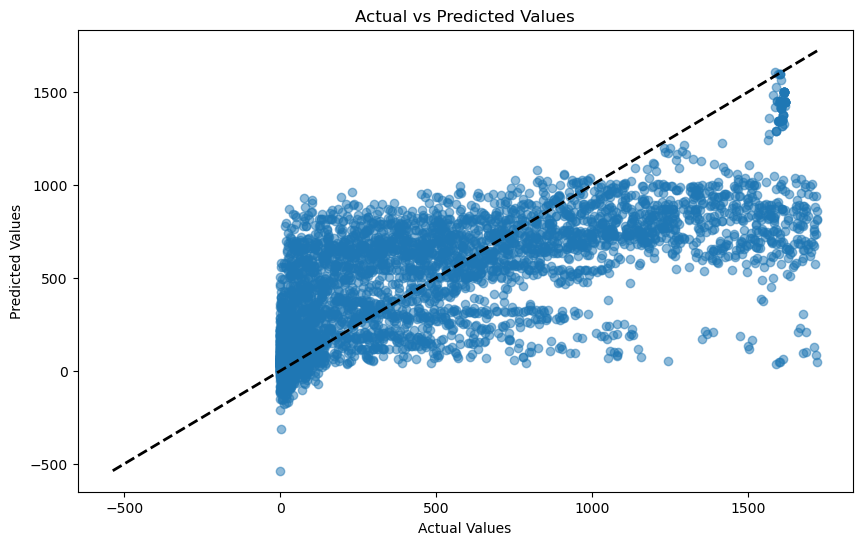

In [15]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

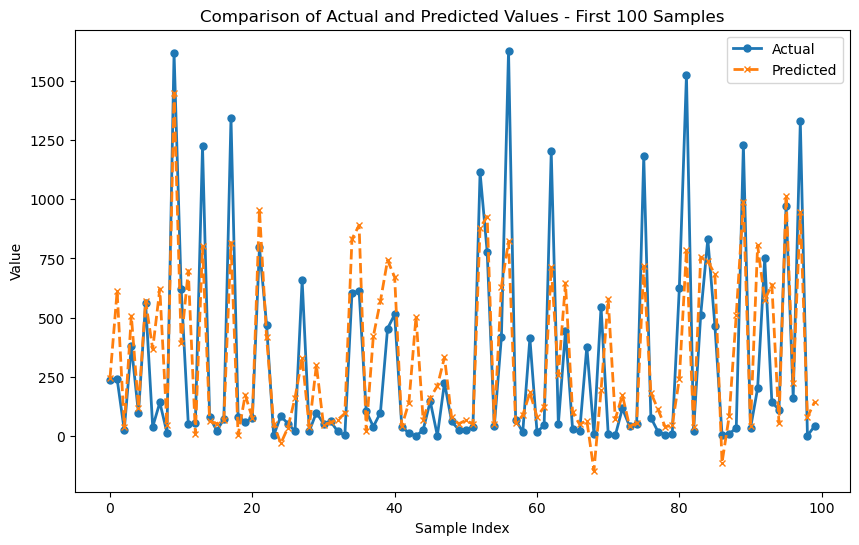

In [16]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

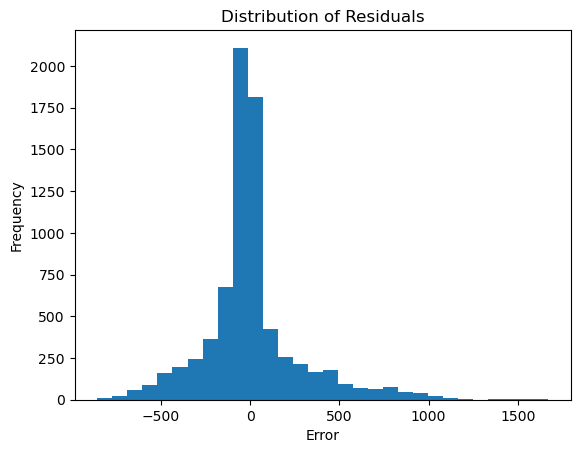

In [17]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [18]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 877us/step - loss: 76848.7344 - mse: 76835.7578 - rmse: 270.3618 - mae: 172.2839 - mape: 2768308480.0000
Test loss (MSE): 76848.734375
Mean Squared Error (MSE): 76835.7578125
Root Mean Squared Error (RMSE): 270.3618469238281
Mean Absolute Error (MAE): 172.2838897705078
Mean Absolute Percentage Error (MAPE): 2768308480.0
